In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# leer tabla

In [2]:
babies = pd.read_csv('babies.txt', sep='\t', header=12)

# Para ver el encabezado de la base de datos

In [3]:
babies.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284.0,First born,27.0,62.0,100.0,Not
1,113,282.0,First born,33.0,64.0,135.0,Not
2,128,279.0,First born,28.0,64.0,115.0,Yes
3,123,NaN,First born,36.0,69.0,190.0,Not
4,108,282.0,First born,23.0,67.0,125.0,Yes


# Estadásticos de resumen de las variables en la base de datos

In [4]:
babies.describe()

,bwt,gestation,age,height,weight
count,1236.000000,1223.000000,1234.000000,1214.000000,1200.000000
mean,119.576861,279.338512,27.255267,64.047776,128.625833
std,18.236452,16.027693,5.781405,2.533409,20.971862
min,55.000000,148.000000,15.000000,53.000000,87.000000
25%,108.750000,272.000000,23.000000,62.000000,114.750000
50%,120.000000,280.000000,26.000000,64.000000,125.000000
75%,131.000000,288.000000,31.000000,66.000000,139.000000
max,176.000000,353.000000,45.000000,72.000000,250.000000


# Dimensión de la base de datos Ver cada variables, el tipo y los valores

In [5]:
babies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bwt        1236 non-null   int64  
 1   gestation  1223 non-null   float64
 2   parity     1236 non-null   object 
 3   age        1234 non-null   float64
 4   height     1214 non-null   float64
 5   weight     1200 non-null   float64
 6   smoke      1226 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 67.7+ KB


# Dimensión de la base de datos

In [6]:
babies.shape

(1236, 7)

# Para ver el peso de las madres

In [7]:
babies.weight.values

array([100., 135., 115., ..., 150., 110., 129.])

# Otra forma de ver el peso almacenado en la columna 6

In [8]:
babies.iloc[:, 5].values

array([100., 135., 115., ..., 150., 110., 129.])

In [9]:
babies.iloc[[1, 124, 568, 829], :]

,bwt,gestation,parity,age,height,weight,smoke
1,113,282.0,First born,33.0,64.0,135.0,Not
124,117,276.0,First born,31.0,69.0,150.0,Not
568,127,254.0,First born,27.0,67.0,146.0,Yes
829,62,228.0,First born,24.0,61.0,107.0,Not


# Para ver la edad y smoke de las mujeres 40, 58, 69 y 256

In [10]:
babies.loc[[39, 57, 68, 255], ['age', 'smoke']]

,age,smoke
39,31.0,Not
57,33.0,Not
68,31.0,Yes
255,31.0,NaN


# Tablas de frecuencia y Gráficas para variables Nominales u ordinales
Creando la variable ordinal clase.peso: clasificación según peso. Recilación nacidos con pesos inferiores a 100 onzas son considerados livianos, aquellos con pesos entre 100 (inclusive) y 140 son aceptables y con pesos de 140 o más se consideran sanos

In [11]:
babies['clase_peso'] = babies.bwt.apply(lambda x: 'Liviano' if x < 100 else('Aceptable' if x < 140  else 'Sano'))

In [12]:
frec_clase_peso = pd.pivot_table(babies, values='bwt', index='clase_peso', aggfunc='count')
frec_clase_peso.columns = ['frecuencias absolutas']
frec_clase_peso

,frecuencias absolutas
clase_peso,
Aceptable,925
Liviano,157
Sano,154


Tabla de frecuencias relativas para clase_peso

In [13]:
frec_rel_clase_peso = frec_clase_peso/frec_clase_peso.sum().sum()
frec_rel_clase_peso.columns = ['frecuencias relativas']
frec_rel_clase_peso

,frecuencias relativas
clase_peso,
Aceptable,0.748382
Liviano,0.127023
Sano,0.124595


In [14]:
pd.concat([frec_clase_peso, frec_rel_clase_peso], axis=1)

,frecuencias absolutas,frecuencias relativas
clase_peso,,
Aceptable,925,0.748382
Liviano,157,0.127023
Sano,154,0.124595


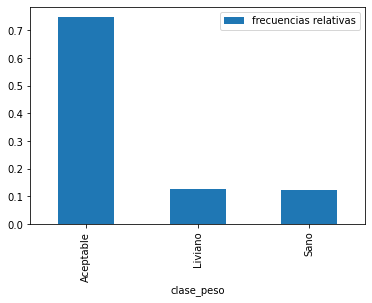

In [15]:
frec_rel_clase_peso.plot(kind='bar')
plt.show()

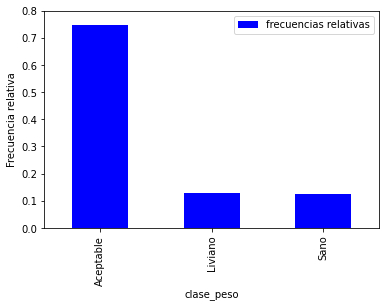

In [16]:
frec_rel_clase_peso.plot(kind='bar', ylim=(0, 0.8), color='blue')
plt.ylabel('Frecuencia relativa')
plt.show()

Diagrama de torta para clase.peso

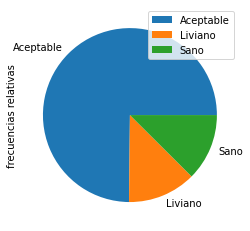

In [17]:
frec_rel_clase_peso.plot(kind='pie', subplots=True)
plt.show()

Diagrama de torta mejorado para clase.peso

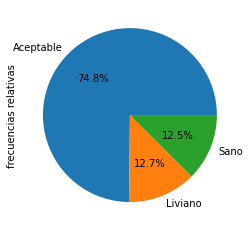

In [18]:
frec_rel_clase_peso.plot(kind='pie', subplots=True, legend=False, autopct='%.1f%%', radius=1)
plt.show()

Tabla de frecuencias absolutas para fumar y clase.peso

In [19]:
tabla_1 = pd.pivot_table(babies, index='smoke', columns='clase_peso', values='bwt', aggfunc='count')
print(tabla_1)

clase_peso  Aceptable  Liviano  Sano
smoke                               
Not               580       56   106
Yes               340      100    44


Tabla de frecuencias relativas para fumar y clase.peso

In [20]:
tabla_2 = tabla_1 / tabla_1.sum().sum()
print(tabla_2)

clase_peso  Aceptable   Liviano      Sano
smoke                                    
Not          0.473083  0.045677  0.086460
Yes          0.277325  0.081566  0.035889


Tabla de frecuencias relativas para fumar y clase.peso por fila

In [21]:
(tabla_1.T / tabla_1.sum(axis=1)).T

clase_peso,Aceptable,Liviano,Sano
smoke,,,
Not,0.781671,0.075472,0.142857
Yes,0.702479,0.206612,0.090909


Tabla de frecuencias relativas para fumar y clase.peso por columna

In [22]:
(tabla_1 / tabla_1.sum(axis=0))

clase_peso,Aceptable,Liviano,Sano
smoke,,,
Not,0.630435,0.358974,0.706667
Yes,0.369565,0.641026,0.293333


Diagrama de barras para las variables fumar y clase.peso

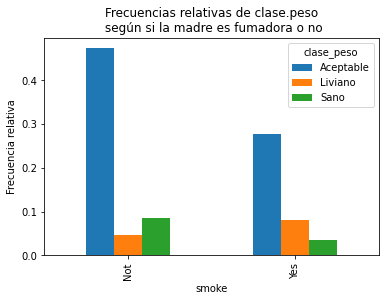

In [23]:
tabla_2.plot(kind='bar', title='Frecuencias relativas de clase.peso\n según si la madre es fumadora o no')
plt.ylabel('Frecuencia relativa')
plt.show()